# Challenge 1

The New York City Fire Department keeps a log of detailed information on incidents handled by FDNY units. In this challenge we will work with a dataset that contains a record of incidents handled by FDNY units from 2013-2017. Download the FDNY data set. Also take a look at the dataset landing page and find descriptions of column names here.

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Incidents_Responded_to_by_Fire_Companies.csv')

In [5]:
#df.head()

In [6]:
#df.info()

__Question : What proportion of FDNY responses in this dataset correspond to the most common type of incident?__

In [7]:
df['INCIDENT_TYPE_DESC'].str.contains('300 - Rescue, EMS incident, other').sum()/df['INCIDENT_TYPE_DESC'].count()

0.3614828304238471

__Question : What is the ratio of the average number of units that arrive to a scene of an incident classified as '111 - Building fire' to the number that arrive for '651 - Smoke scare, odor of smoke'?__

In [8]:
df['INCIDENT_TYPE_DESC'].str.contains('111 - Building fire').sum()\
/df['INCIDENT_TYPE_DESC'].str.contains('651 - Smoke scare, odor of smoke').sum()

0.08789046762106846

__Question : How many times more likely is an incident in Staten Island a false call compared to in Manhattan? The answer should be the ratio of Staten Island false call rate to Manhattan false call rate. A false call is an incident for which 'INCIDENT_TYPE_DESC' is '710 - Malicious, mischievous false call, other'.__

In [9]:
df_710 = df[df['INCIDENT_TYPE_DESC'] == '710 - Malicious, mischievous false call, other']
#byborough = df_710.groupby('BOROUGH_DESC').count()
#byborough.head()

In [10]:
df_710['BOROUGH_DESC'].str.contains('3 - Staten Island').sum()\
/df_710['BOROUGH_DESC'].str.contains('1 - Manhattan').sum()

0.327892234548336

__Question : Check the distribution of the number of minutes it takes between the time a '111 - Building fire' incident has been logged into the Computer Aided Dispatch system and the time at which the first unit arrives on scene. What is the third quartile of that distribution. Note: the number of minutes can be fractional (ie, do not round).__

In [13]:
df_111 = df[df['INCIDENT_TYPE_DESC'] == '111 - Building fire']
df_111 = df_111[['INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME']]
#df_111.head()

In [14]:
df_111['INCIDENT_DATE_TIME_t'] = pd.to_datetime(df_111['INCIDENT_DATE_TIME'])
df_111['ARRIVAL_DATE_TIME_1'] = pd.to_datetime(df_111['ARRIVAL_DATE_TIME'])

In [15]:
df_111['time_diff'] = df_111['ARRIVAL_DATE_TIME_1'] - df_111['INCIDENT_DATE_TIME_t']

In [16]:
df_111['time_diff_hour'] = pd.to_datetime(df_111['time_diff']).\
apply(lambda time: time.hour)
df_111['time_diff_min'] = pd.to_datetime(df_111['time_diff']).\
apply(lambda time: time.minute)
df_111['time_diff_sec'] = pd.to_datetime(df_111['time_diff']).\
apply(lambda time: time.second)

In [17]:
df_111['total_time_difference_min'] = \
    (df_111['time_diff_hour'])*60\
    +(df_111['time_diff_min'])\
    +(df_111['time_diff_sec'])/60

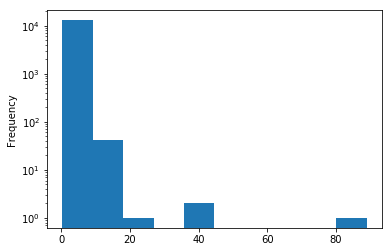

In [18]:
df_111 = df_111[df_111['total_time_difference_min']<200]
df_111['total_time_difference_min'].plot(kind='hist',bins=10,logy=True)

In [20]:
df_111['total_time_difference_min'].describe()

count    13068.000000
mean         3.592468
std          1.480707
min          0.250000
25%          2.850000
50%          3.450000
75%          4.150000
max         88.983333
Name: total_time_difference_min, dtype: float64

In [22]:
#sns.boxplot(df_111['total_time_difference_min'])

__Question : We can use the FDNY dataset to investigate at what time of the day people cook most. Compute what proportion of all incidents are cooking fires for every hour of the day by normalizing the number of cooking fires in a given hour by the total number of incidents that occured in that hour. Find the hour of the day that has the highest proportion of cooking fires and submit that proportion of cooking fires. A cooking fire is an incident for which 'INCIDENT_TYPE_DESC' is '113 - Cooking fire, confined to container'. Note: round incident times down. For example, if an incident occured at 22:55 it occured in hour 22.__

In [23]:
df_113 = df[df['INCIDENT_TYPE_DESC']=='113 - Cooking fire, confined to container']
#df_113.head(100)

In [24]:
#df_113.shape[0]

In [25]:
df_113['INCIDENT_DATE_TIME_hour'] = pd.to_datetime(df_113['INCIDENT_DATE_TIME']).apply(lambda time: time.hour)

In [26]:
df['INCIDENT_DATE_TIME_hour'] = pd.to_datetime(df['INCIDENT_DATE_TIME']).apply(lambda time: time.hour)

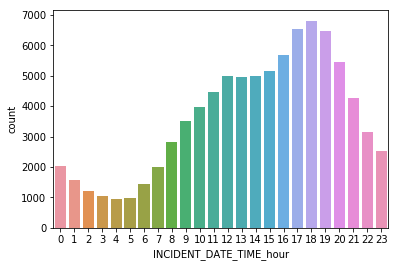

In [27]:
sns.countplot(df_113['INCIDENT_DATE_TIME_hour'])

In [28]:
df_113['INCIDENT_DATE_TIME_hour'].value_counts()

18    6806
17    6541
19    6456
16    5680
20    5451
15    5150
12    5000
14    4979
13    4963
11    4464
21    4284
10    3983
9     3503
22    3140
8     2818
23    2530
0     2047
7     2007
1     1571
6     1455
2     1203
3     1059
5      998
4      951
Name: INCIDENT_DATE_TIME_hour, dtype: int64

In [29]:
df['INCIDENT_DATE_TIME_hour'].value_counts()

17    136283
18    133853
16    128304
19    127787
15    126410
14    126016
13    121908
20    120731
12    117203
11    113931
21    110342
10    109463
9     102894
22     99051
8      91402
23     88474
7      72671
0      71631
1      57394
6      52133
2      47079
5      41848
3      41313
4      39658
Name: INCIDENT_DATE_TIME_hour, dtype: int64

Maximum cooking fire happened at 18:00. The proportion of this hour of cooking fire with respect to the all incident is

In [30]:
6806/133853

0.050846824501505385

__Question: For this question, only consider incidents that have information about whether a CO detector was present or not. We are interested in how many times more likely it is that an incident is long when no CO detector is present compared to when a CO detector is present. For events with CO detector and for those without one, compute the proportion of incidents that lasted 20-30, 30-40, 40-50, 50-60, and 60-70 minutes (both interval boundary values included) by dividing the number of incidents in each time interval with the total number of incidents. For each bin, compute the ratio of the 'CO detector absent' frequency to the 'CO detector present' frequency. Perform a linear regression of this ratio to the mid-point of the bins. From this, what is the predicted ratio for events lasting 39 minutes?__

In [31]:
df_co = df[['CO_DETECTOR_PRESENT_DESC', 'TOTAL_INCIDENT_DURATION']]

In [32]:
#df_co.info()

In [33]:
df_co = df_co.dropna()

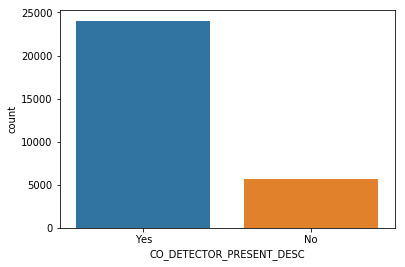

In [34]:
sns.countplot(df_co['CO_DETECTOR_PRESENT_DESC'])

In [35]:
df_co['TOTAL_INCIDENT_DURATION_Min']\
= df_co['TOTAL_INCIDENT_DURATION'].apply(lambda x: x/60)

In [36]:
df_co = df_co[(df_co['TOTAL_INCIDENT_DURATION_Min']>=20)\
              & (df_co['TOTAL_INCIDENT_DURATION_Min']<=70)]

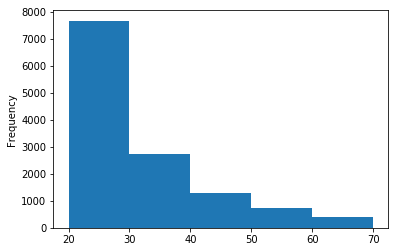

In [37]:
df_co['TOTAL_INCIDENT_DURATION_Min'].plot(kind='hist', bins=5)

In [38]:
df_co['MIN_RANGE']=np.nan
lst = [df_co]

for col in lst:
    col.loc[col['TOTAL_INCIDENT_DURATION_Min']<=30, 'MIN_RANGE'] = 'm23'
    col.loc[(col['TOTAL_INCIDENT_DURATION_Min']>30) &(col['TOTAL_INCIDENT_DURATION_Min']<=40), 'MIN_RANGE'] = 'm34'
    col.loc[(col['TOTAL_INCIDENT_DURATION_Min']>40) &(col['TOTAL_INCIDENT_DURATION_Min']<=50), 'MIN_RANGE'] = 'm45'
    col.loc[(col['TOTAL_INCIDENT_DURATION_Min']>50) &(col['TOTAL_INCIDENT_DURATION_Min']<=60), 'MIN_RANGE'] = 'm56'
    col.loc[(col['TOTAL_INCIDENT_DURATION_Min']>60) &(col['TOTAL_INCIDENT_DURATION_Min']<=70), 'MIN_RANGE'] = 'm67'

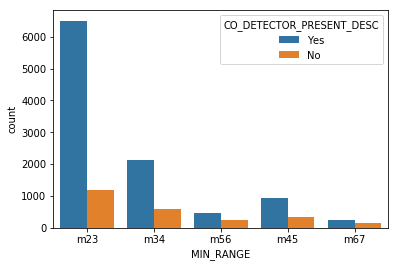

In [39]:
sns.countplot(df_co['MIN_RANGE'], hue=df_co['CO_DETECTOR_PRESENT_DESC'])

In [40]:
myclass = pd.crosstab(index=df_co['CO_DETECTOR_PRESENT_DESC'], 
                            columns=df_co["MIN_RANGE"],
                             margins=True)   # Include row and column totals

In [41]:
myclass

MIN_RANGE,m23,m34,m45,m56,m67,All
CO_DETECTOR_PRESENT_DESC,,,,,,
No,1181,586,348,249,158,2522
Yes,6501,2145,923,481,235,10285
All,7682,2731,1271,730,393,12807


In [42]:
A = [1181,586,348,249,158]
B = [6501,2145,923,481,235]
C = [x/y for x, y in zip(A, B)]

In [43]:
C

[0.18166435932933395,
 0.2731934731934732,
 0.37703141928494044,
 0.5176715176715176,
 0.6723404255319149]

In [44]:
D=[25,35,45,55,65]

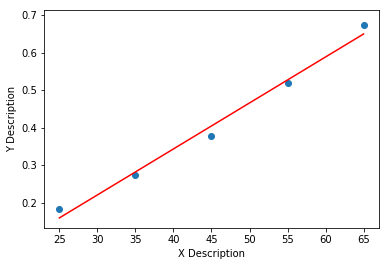

best fit line:
y = -0.1472433406 + 0.0122583018x


In [45]:
xd = D
yd = C

# make the scatter plot
plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]


plt.xlabel("X Description")
plt.ylabel("Y Description")


plt.plot(xl, yl, '-r')
plt.show()

print('best fit line:\ny = {:.10f} + {:.10f}x'.format(intercept, slope))


In [46]:
y = -0.1472433406 + 0.0122583018*39
y

0.3308304296

__Question: Calculate the chi-square test statistic for testing whether an incident is more likely to last longer than 60 minutes when CO detector is not present. Again only consider incidents that have information about whether a CO detector was present or not.__

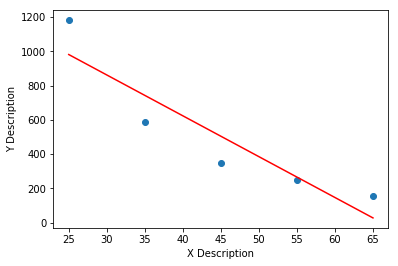

best fit line:
y = 1576.7500000000 + -23.8300000000x


In [47]:
xd = D
yd = A

# make the scatter plot
plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]


plt.xlabel("X Description")
plt.ylabel("Y Description")


plt.plot(xl, yl, '-r')
plt.show()

print('best fit line:\ny = {:.10f} + {:.10f}x'.format(intercept, slope))


In [48]:
y = 1576.7500000000-23.8300000000*65
y

27.800000000000182

In [50]:
observed = 158
expected = y

chi_squared_stat = (((observed-expected)**2)/expected)
chi_squared_stat

609.7856115107857

__Question: What is the coefficient of determination (R squared) between the number of residents at each zip code and the number of inicidents whose type is classified as '111 - Building fire' at each of those zip codes. Note: The 2010 US Census population by zip code dataset should be downloaded from here. You will need to use both the FDNY responses and the US Census dataset. Ignore zip codes that do not appear in the census table.__

In [51]:
df_111_new = df[df['INCIDENT_TYPE_DESC'] == '111 - Building fire']

In [52]:
df_111_new = df_111_new[['INCIDENT_TYPE_DESC', 'ZIP_CODE']]

In [53]:
#sns.countplot(df_111_new['ZIP_CODE'])

In [55]:
#df_111_new.describe()

In [56]:
df_us = pd.read_csv('2010+Census+Population+By+Zipcode+(ZCTA).csv')

In [57]:
#df_us.info()

In [58]:
#Filtering 
Census_Subset = df_us[df_us['Zip Code ZCTA'].isin(df_111_new['ZIP_CODE'].tolist())]
Census_Subset.columns = ['ZIP_CODE', 'POPULATION']
Census_Subset.to_csv('./census.csv')

In [59]:
#Filtering 
df111_Subset = df_111_new[df_111_new['ZIP_CODE'].isin(Census_Subset['ZIP_CODE'].tolist())]
df111_Subset.head()

,INCIDENT_TYPE_DESC,ZIP_CODE
90,111 - Building fire,11219
198,111 - Building fire,10456
439,111 - Building fire,10030
491,111 - Building fire,11373
568,111 - Building fire,11207


In [62]:
df111_Subset['ZIP_CODE']=df111_Subset['ZIP_CODE'].astype(int)

In [63]:
dfmerged = pd.merge(Census_Subset,df111_Subset,on='ZIP_CODE')
dfmerged.head()

,ZIP_CODE,POPULATION,INCIDENT_TYPE_DESC
0,10001,21102,111 - Building fire
1,10001,21102,111 - Building fire
2,10001,21102,111 - Building fire
3,10001,21102,111 - Building fire
4,10001,21102,111 - Building fire


In [64]:
ratings = pd.DataFrame(dfmerged.groupby('ZIP_CODE')['POPULATION'].mean())
ratings.head()
ratings['number of ratings'] = pd.DataFrame(dfmerged.groupby('ZIP_CODE')['POPULATION'].count())
#ratings
#Census_Subset['number of inci'] = pd.DataFrame(dfmerged.groupby('ZIP_CODE').value_counts().tolist())
#Census_Subset['number of inci'] = df111_Subset['ZIP_CODE'].value_counts().tolist()

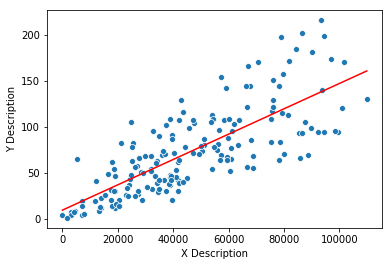

$R^2 = 0.5928733920$
best fit line:
y = 9.4534335298 + 0.0013772770x


In [65]:
sns.scatterplot(ratings['POPULATION'],ratings['number of ratings'])
# determine best fit line
par = np.polyfit(ratings['POPULATION'],ratings['number of ratings'], 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(ratings['POPULATION']), max(ratings['POPULATION'])]
yl = [slope*xx + intercept  for xx in xl]


plt.xlabel("X Description")
plt.ylabel("Y Description")

# coefficient of determination, plot text
variance = np.var(ratings['number of ratings'])
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(ratings['POPULATION'],ratings['number of ratings'])])
Rsqr = np.round(1-residuals/variance, decimals=10)

#plt.text(.9*max(ratings['POPULATION'])+.1*min(ratings['POPULATION']),.9*max(ratings['number of ratings'])+.1*min(ratings['number of ratings']),'$R^2 = %0.10f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')
plt.show()
print('$R^2 = %0.10f$'% Rsqr)
print('best fit line:\ny = {:.10f} + {:.10f}x'.format(intercept, slope))